# Exploratory Data Analysis (EDA)

This notebook presents an exploratory data analysis of the dataset `SimulationResult.json`. The dataset contains data generated by a simulation of an industrial plant with two turbines. The data is used to predict the specific consumption and generated power of the turbines.

## Data Description

### Input Data

- `vazaoVapor`: Steam flow rate generated by boilers – [273.0, 416.0] – 8 steps.
- `pressaoVapor`: Steam pressure generated by boilers – [57.0, 63.0] - 4 steps.
- `temperaturaVapor`: Steam temperature generated by boilers (Kelvin) – [718.0, 877.0] – 4 steps
- `cargaVaporTG1`: Steam flow rate at the inlet of turbine 1_1 – [107.0, 271.0] – 8 steps
- `cargaVaporTG2`: Steam flow rate at the inlet of turbine 2_1 - [53.0, 120.0] - 8 steps
- `habilitaTG1`: Turbine 1_1/1_2 status (On/Off) - [0, 1] - 1 step
- `habilitaTG2`: Turbine 2_1/2_2 status (On/Off) – [0, 1] - 1 step

### Output Data

- `consumoEspecificoTG1_1`: Specific consumption of turbine 1_1.
- `consumoEspecificoTG1_2`: Specific consumption of turbine 1_2.
- `consumoEspecificoTG2_1`: Specific consumption of turbine 2_1.
- `consumoEspecificoTG2_2`: Specific consumption of turbine 2_2.
- `potenciaGeradaTG1_1`: Generated power of turbine 1_1.
- `potenciaGeradaTG1_2`: Generated power of turbine 1_2.
- `potenciaGeradaTG2_1`: Generated power of turbine 2_1.
- `potenciaGeradaTG2_2`: Generated power of turbine 2_2.
- `vazaoVaporEscape`: Total steam escape flow rate generated.
- `pressaoVaporEscape`: Steam escape pressure generated.
- `temperaturaVaporEscape`: Steam escape temperature generated.


In [1]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_0 = pd.read_json('./data/raw/SimulationResult.json')

In [3]:
df = pd.read_json('./data/raw/SimulationResult2.json')
df.head()

,step,vazaoVapor,pressaoVapor,temperaturaVapor,cargaVaporTG1,cargaVaporTG2,habilitaTG1,habilitaTG2,potenciaGeradaTG1_2,potenciaGeradaTG2_2,potenciaGeradaTG2_1,potenciaGeradaTG1_1,vazaoVaporEscape,temperaturaVaporEscape,pressaoVaporEscape,consumoEspecificoTG2_2,consumoEspecificoTG2_1,consumoEspecificoTG1_2,consumoEspecificoTG1_1,status
0,0,263.078370,57.419117,728.414570,108.616210,50.721489,0,0,0.0,0.000000,0.000000,0.0,291.986802,403.15,2.3,0.000000,0.000000,0.0,0.0,OK
1,1,282.103961,58.607302,737.854026,102.122037,50.496216,0,0,0.0,0.000000,0.000000,0.0,318.504931,403.15,2.3,0.000000,0.000000,0.0,0.0,OK
2,2,261.112878,58.973315,693.887523,103.789047,51.843660,0,0,0.0,0.000000,0.000000,0.0,279.373804,403.15,2.3,0.000000,0.000000,0.0,0.0,OK
3,3,269.834454,54.318838,748.630084,103.771199,52.995014,0,0,0.0,0.000000,0.000000,0.0,303.054202,403.15,2.3,0.000000,0.000000,0.0,0.0,OK
4,4,283.190729,54.914962,701.431269,111.697638,50.375678,0,1,0.0,2.537824,6.252941,0.0,306.899172,403.15,2.3,11.969184,8.056317,0.0,0.0,OK


In [4]:
features = ['vazaoVapor', 'pressaoVapor', 'temperaturaVapor',
            'cargaVaporTG1', 'cargaVaporTG2', 'habilitaTG1', 'habilitaTG2']

In [5]:
targets = ['consumoEspecificoTG1_1', 'consumoEspecificoTG1_2',
           'consumoEspecificoTG2_1', 'consumoEspecificoTG2_2',
           'potenciaGeradaTG1_1', 'potenciaGeradaTG1_2',
           'potenciaGeradaTG2_1', 'potenciaGeradaTG2_2',
           'vazaoVaporEscape', 'pressaoVaporEscape', 'temperaturaVaporEscape']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288059 entries, 0 to 288058
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   step                    288059 non-null  int64  
 1   vazaoVapor              288059 non-null  float64
 2   pressaoVapor            288059 non-null  float64
 3   temperaturaVapor        288059 non-null  float64
 4   cargaVaporTG1           288059 non-null  float64
 5   cargaVaporTG2           288059 non-null  float64
 6   habilitaTG1             288059 non-null  int64  
 7   habilitaTG2             288059 non-null  int64  
 8   potenciaGeradaTG1_2     288059 non-null  float64
 9   potenciaGeradaTG2_2     288059 non-null  float64
 10  potenciaGeradaTG2_1     288059 non-null  float64
 11  potenciaGeradaTG1_1     288059 non-null  float64
 12  vazaoVaporEscape        287936 non-null  float64
 13  temperaturaVaporEscape  287936 non-null  float64
 14  pressaoVaporEscape  

In [7]:
df.isna().sum()

step                        0
vazaoVapor                  0
pressaoVapor                0
temperaturaVapor            0
cargaVaporTG1               0
cargaVaporTG2               0
habilitaTG1                 0
habilitaTG2                 0
potenciaGeradaTG1_2         0
potenciaGeradaTG2_2         0
potenciaGeradaTG2_1         0
potenciaGeradaTG1_1         0
vazaoVaporEscape          123
temperaturaVaporEscape    123
pressaoVaporEscape        123
consumoEspecificoTG2_2      0
consumoEspecificoTG2_1      0
consumoEspecificoTG1_2      0
consumoEspecificoTG1_1      0
status                      0
dtype: int64

In [8]:
df['status'].value_counts()

status
OK                    287936
Falha na simulação       123
Name: count, dtype: int64

In [9]:
df.query('status == "Falha na simulação"').head()

,step,vazaoVapor,pressaoVapor,temperaturaVapor,cargaVaporTG1,cargaVaporTG2,habilitaTG1,habilitaTG2,potenciaGeradaTG1_2,potenciaGeradaTG2_2,potenciaGeradaTG2_1,potenciaGeradaTG1_1,vazaoVaporEscape,temperaturaVaporEscape,pressaoVaporEscape,consumoEspecificoTG2_2,consumoEspecificoTG2_1,consumoEspecificoTG1_2,consumoEspecificoTG1_1,status
898,898,283.617837,56.813550,728.805423,218.786299,68.590267,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Falha na simulação
2209,2304,273.848451,57.839306,746.992757,245.400395,52.607378,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Falha na simulação
3335,3529,279.340540,55.314592,817.493027,234.299283,85.803103,1,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Falha na simulação
3779,4071,260.428246,58.898091,856.213567,130.959400,67.775728,0,1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Falha na simulação
7521,8104,273.407623,55.818050,732.644611,154.475233,71.937355,1,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Falha na simulação


In [10]:
df.step.is_unique

True

We decided to drop the lines with Fail Simulation Status (`status` == "Falha na simulação")

In [11]:
data = df.query('status == "OK"').copy().drop(columns=['status'])

In [12]:
# Check which columns have constant values
print('Columns with constant values:', data.columns[data.nunique() == 1].tolist())

Columns with constant values: ['temperaturaVaporEscape', 'pressaoVaporEscape']


In [13]:
data['temperaturaVaporEscape'].unique()

array([403.15])

In [14]:
data['pressaoVaporEscape'].unique()

array([2.3])

In [15]:
# Checking the columns with prediction values lower than 0
(data < 0).sum()

step                      0
vazaoVapor                0
pressaoVapor              0
temperaturaVapor          0
cargaVaporTG1             0
cargaVaporTG2             0
habilitaTG1               0
habilitaTG2               0
potenciaGeradaTG1_2       0
potenciaGeradaTG2_2       0
potenciaGeradaTG2_1       0
potenciaGeradaTG1_1       0
vazaoVaporEscape          0
temperaturaVaporEscape    0
pressaoVaporEscape        0
consumoEspecificoTG2_2    0
consumoEspecificoTG2_1    0
consumoEspecificoTG1_2    0
consumoEspecificoTG1_1    0
dtype: int64

We decided to drop the lines with potenciaGeradaTG2_2 < 0

In [16]:
data['potenciaGeradaTG2_2']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         2.537824
            ...   
288054    0.000000
288055    9.040932
288056    8.805452
288057    8.589348
288058    8.853761
Name: potenciaGeradaTG2_2, Length: 287936, dtype: float64

In [17]:
data = data.query('potenciaGeradaTG2_2 >= 0')

In [19]:
# Checking the proportion of the dataset for each value of the target low cardinality columns
data[['potenciaGeradaTG1_2', 'consumoEspecificoTG1_2']].value_counts(normalize=True)

potenciaGeradaTG1_2  consumoEspecificoTG1_2
0.000000             0.000000                  0.500045
17.846323            9.049215                  0.000010
20.739020            9.391977                  0.000010
17.337783            8.801348                  0.000010
15.766938            7.703803                  0.000007
                                                 ...   
17.472533            8.876913                  0.000003
17.472508            8.876900                  0.000003
17.472428            8.876857                  0.000003
17.472389            8.876836                  0.000003
27.444226            10.368289                 0.000003
Name: proportion, Length: 143026, dtype: float64

## Plotting Histograms to Understand the Data

array([[<Axes: title={'center': 'vazaoVapor'}>,
        <Axes: title={'center': 'pressaoVapor'}>,
        <Axes: title={'center': 'temperaturaVapor'}>],
       [<Axes: title={'center': 'cargaVaporTG1'}>,
        <Axes: title={'center': 'cargaVaporTG2'}>,
        <Axes: title={'center': 'habilitaTG1'}>],
       [<Axes: title={'center': 'habilitaTG2'}>, <Axes: >, <Axes: >]],
      dtype=object)

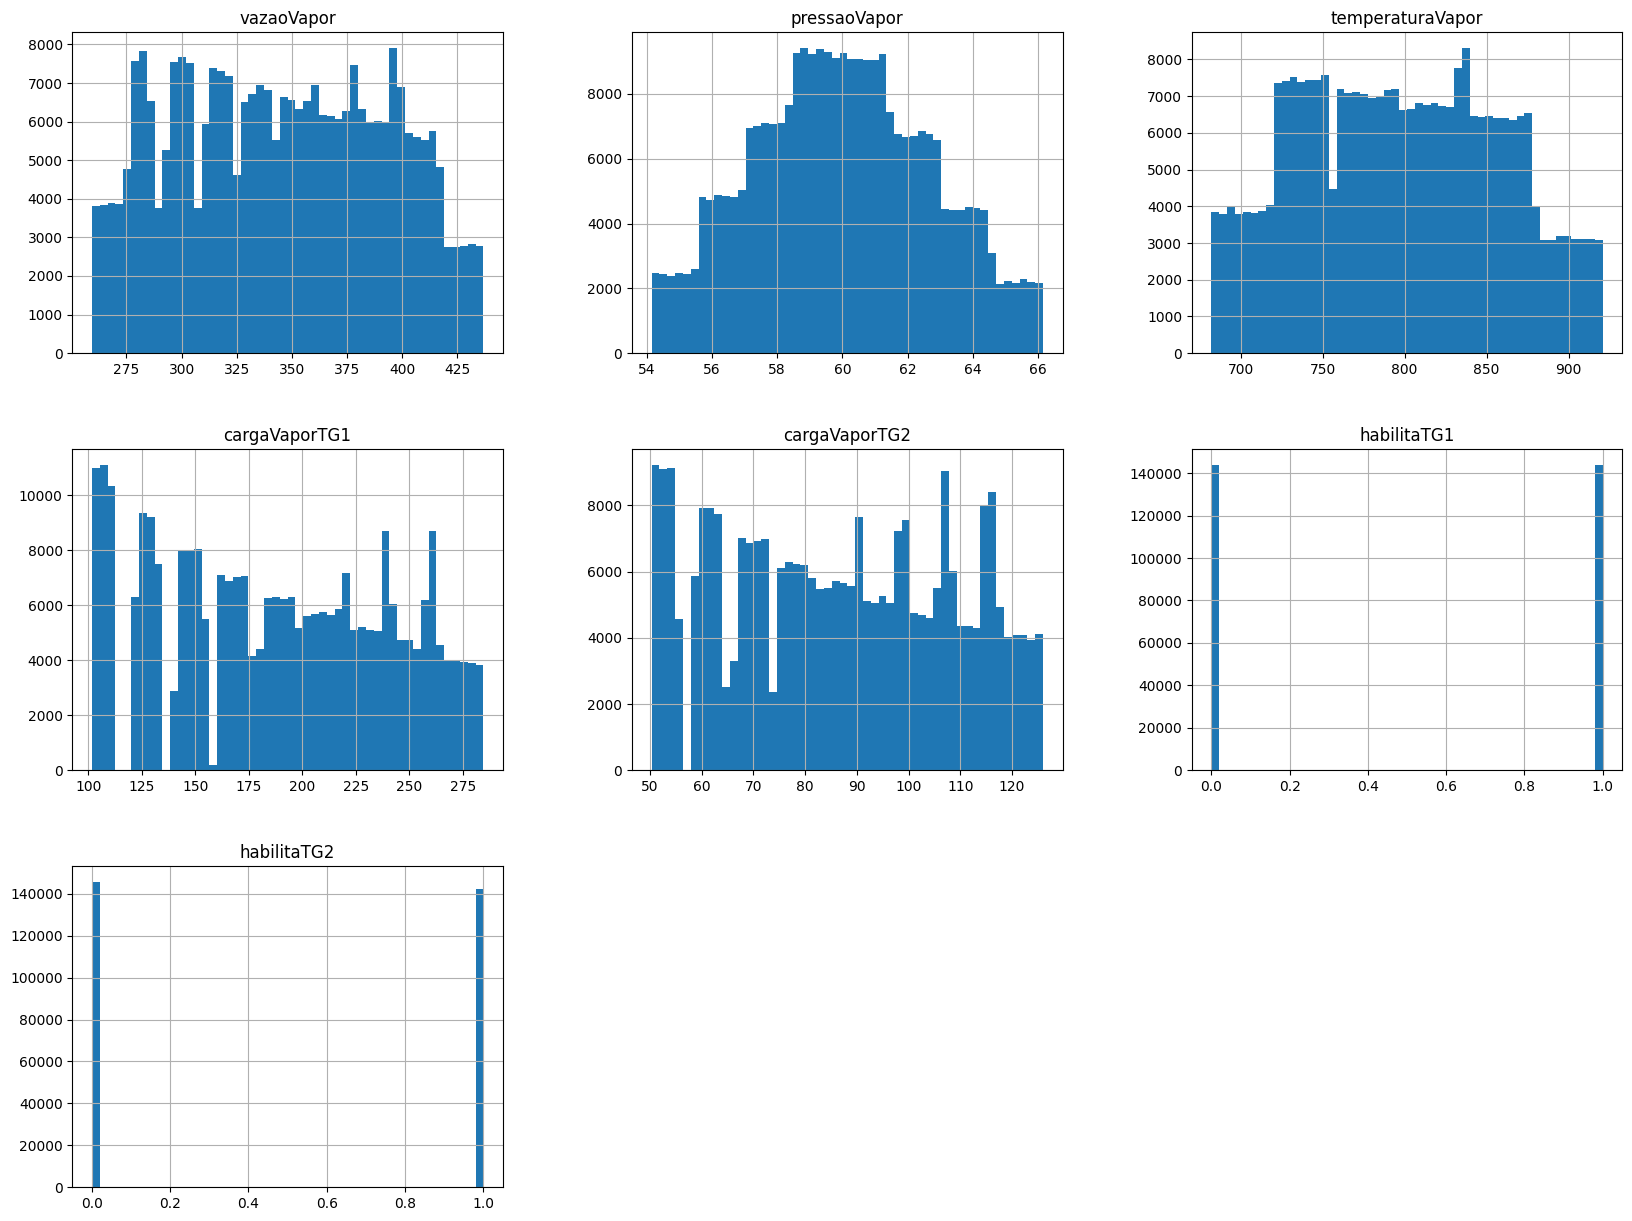

In [20]:
# Plot histogram for each of the features
data[features].hist(bins=50, figsize=(20, 15))

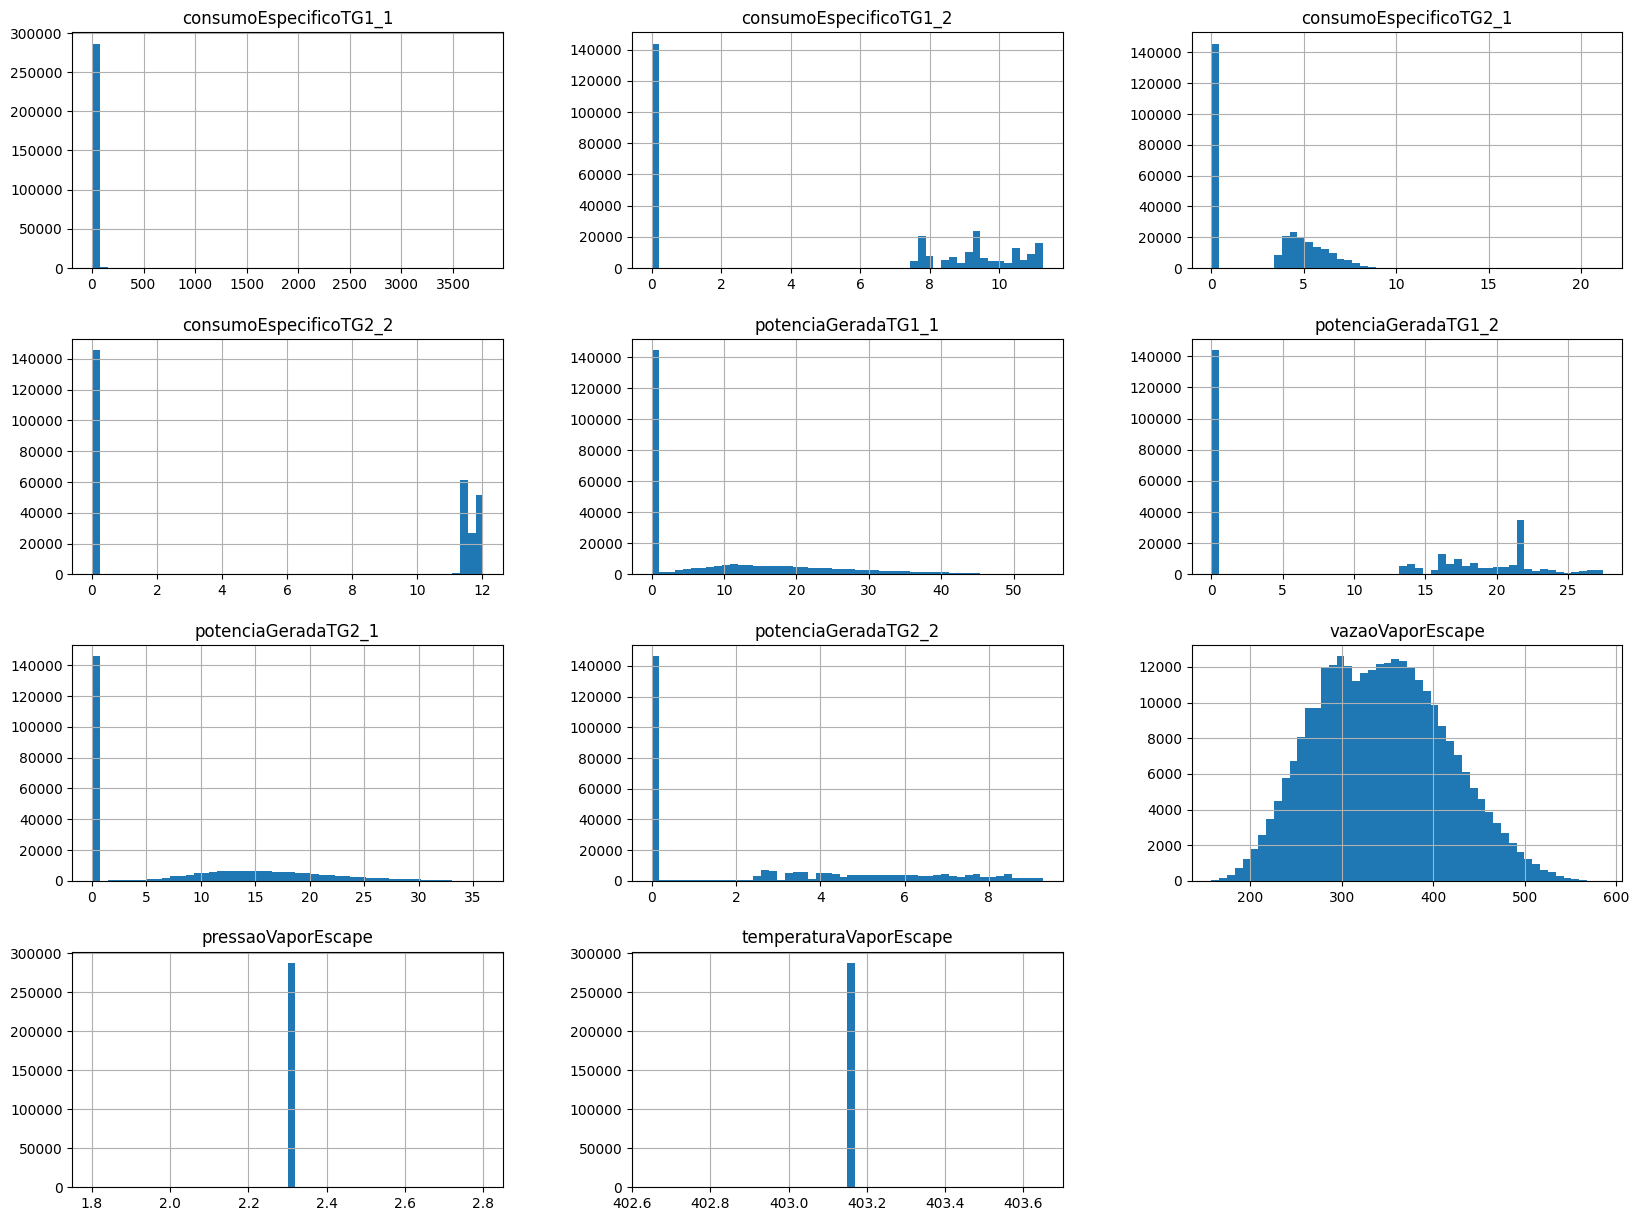

In [21]:
# Plot histogram for each of the targets
data[targets].hist(bins=50, figsize=(20, 15));

<Axes: >

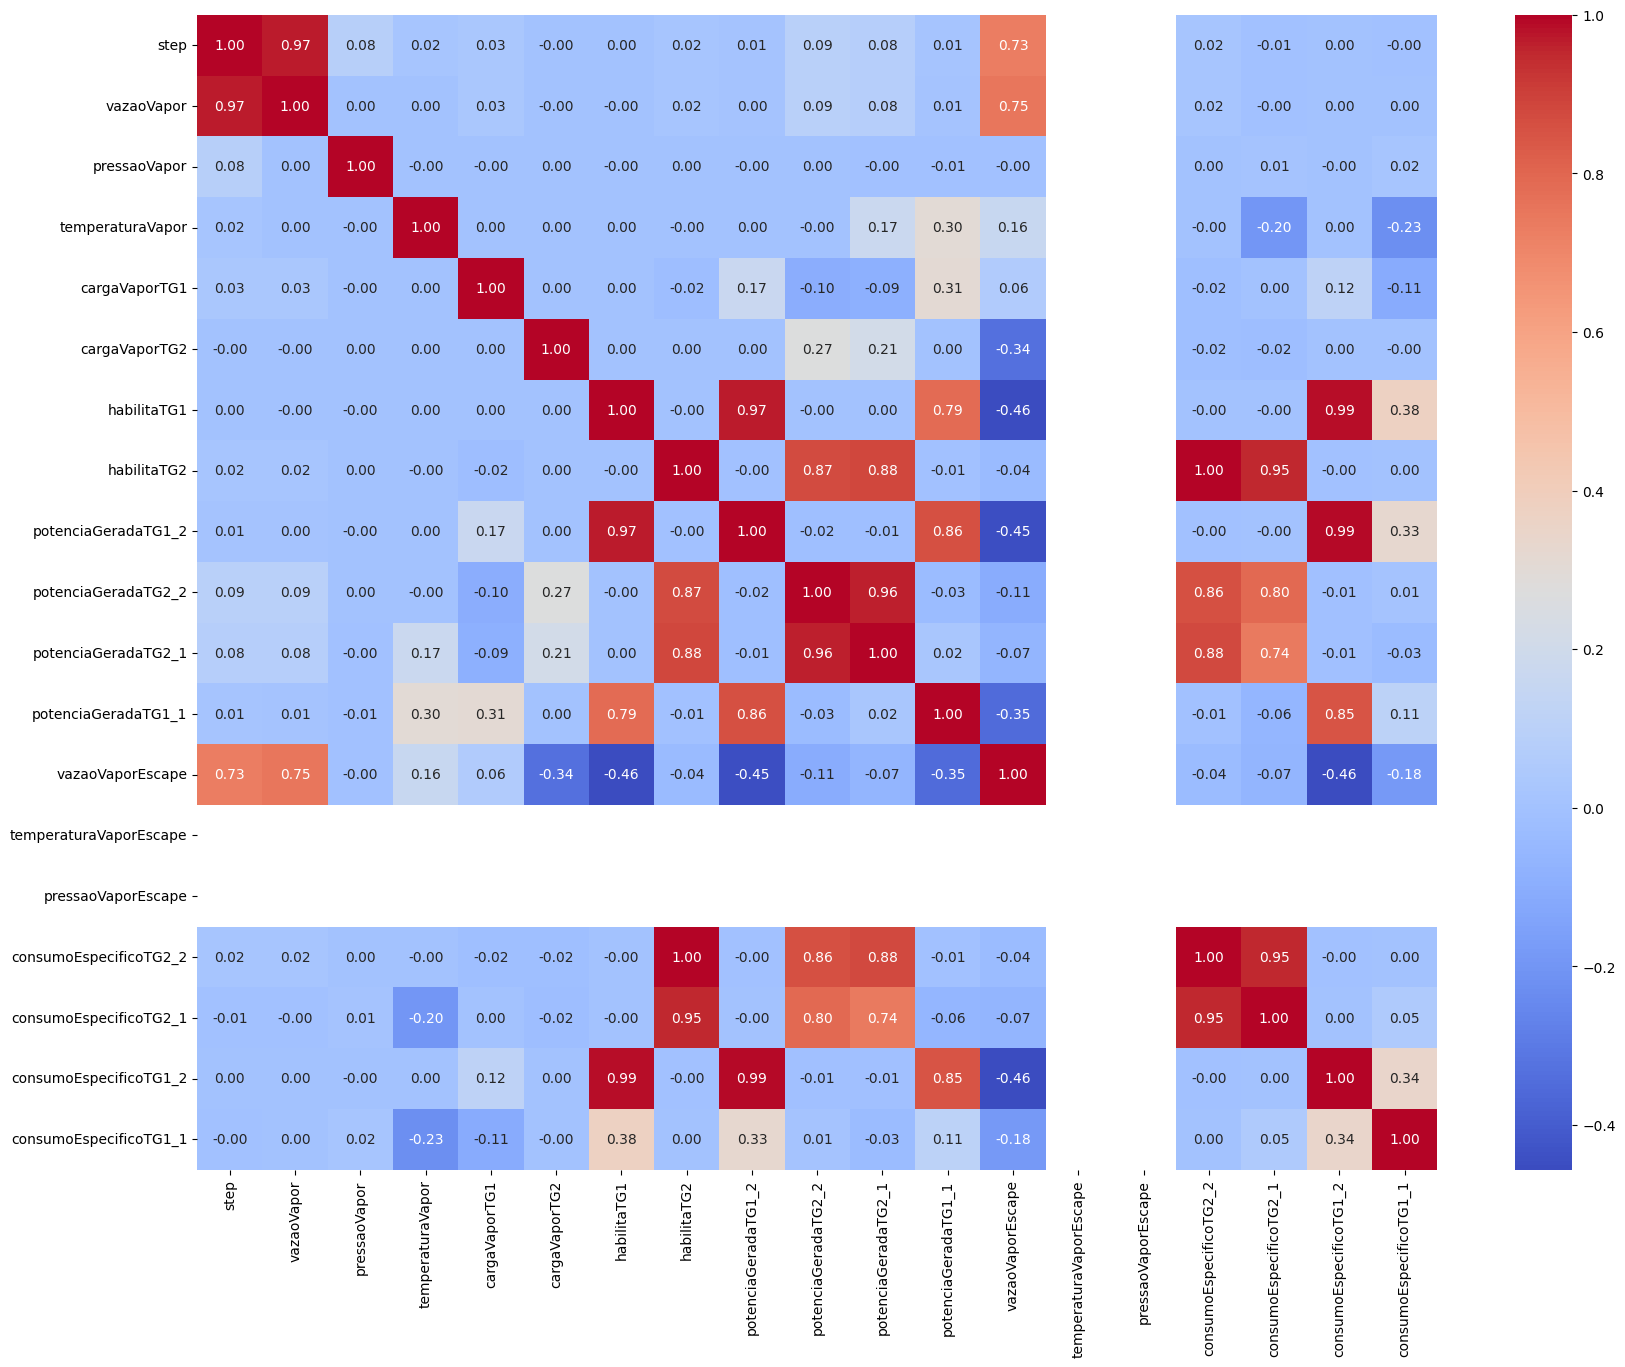

In [22]:
# Plot correlation matrix
corr = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

In [23]:
corr_features_targets = corr.loc[features, targets]
corr_columns_order = corr_features_targets.abs().sum(axis=1).sort_values(ascending=False).index.to_list()

# Sort the correlation matrix by the sum of the absolute values of the correlations
corr_features_targets = corr_features_targets.loc[corr_columns_order]

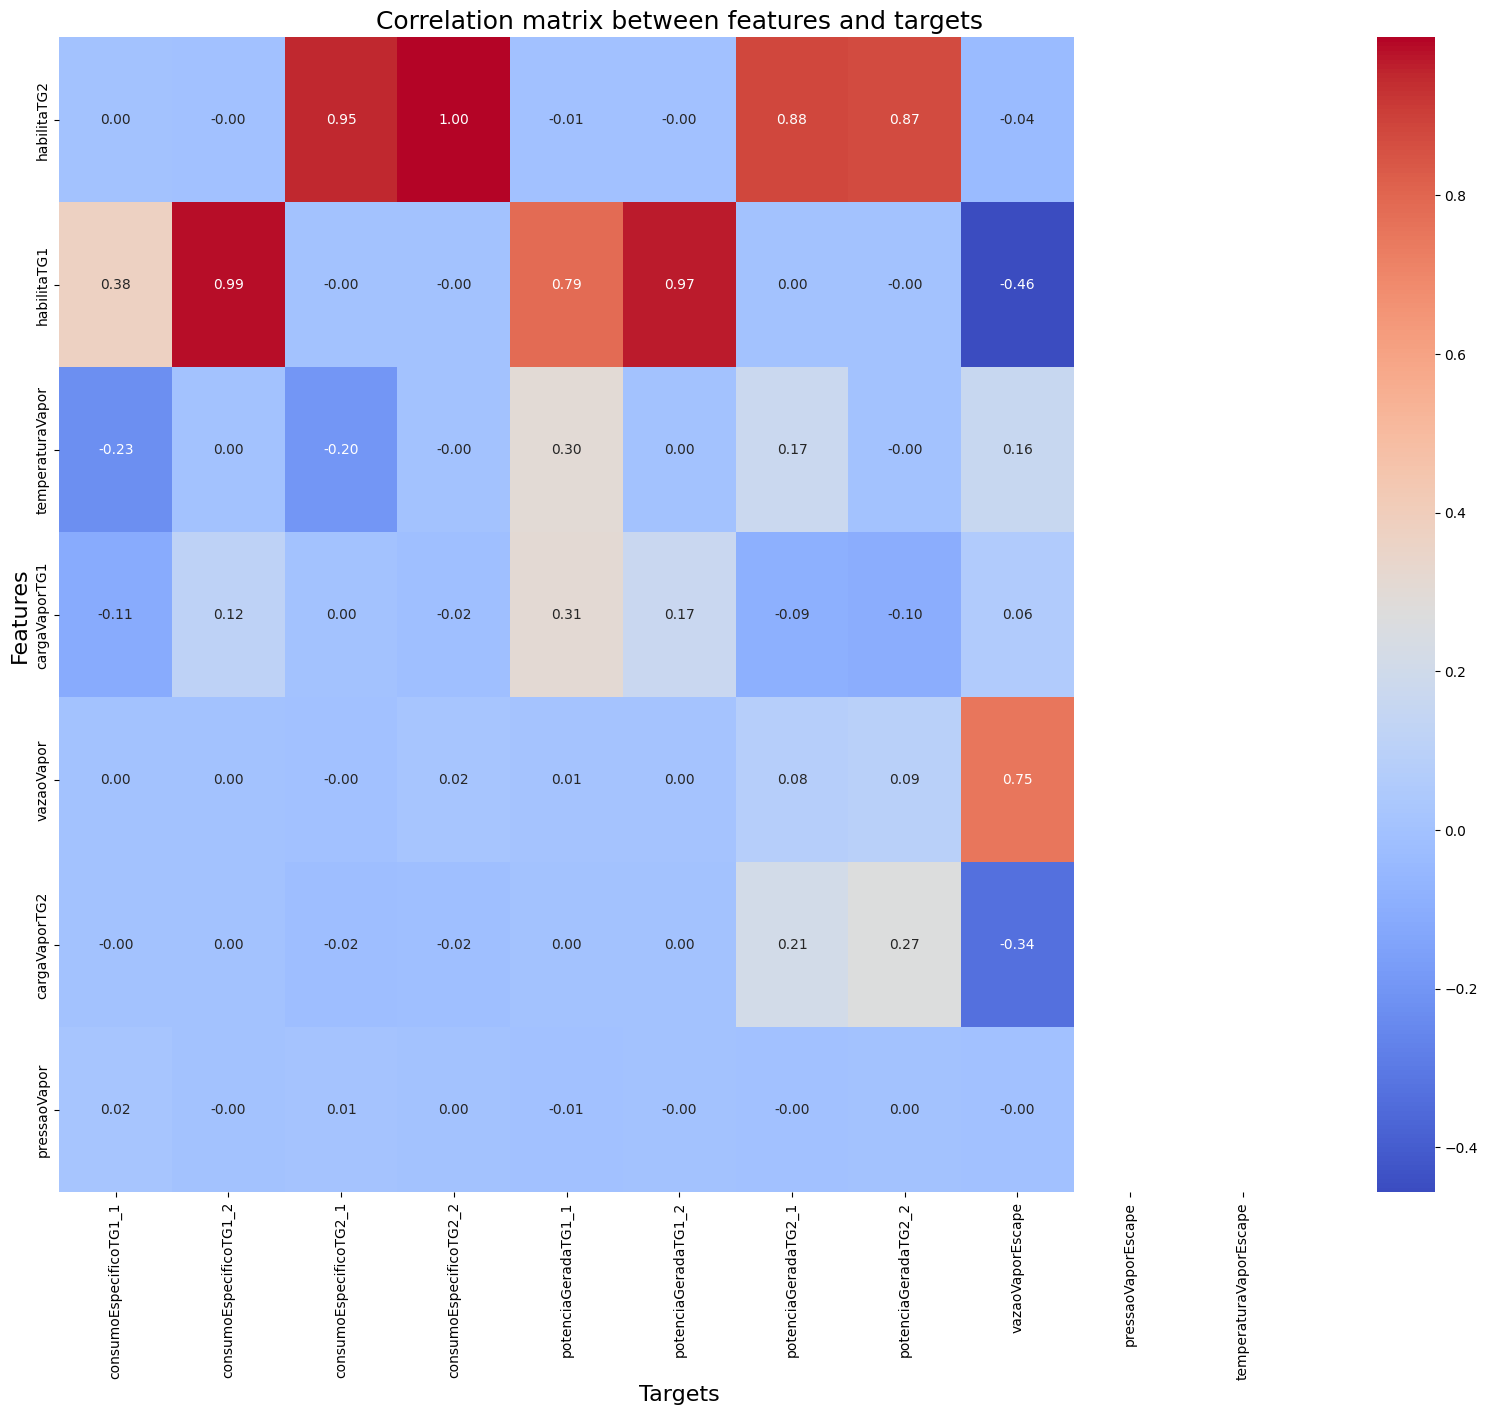

In [24]:
# Create a heatmap with the features in the vertical axis and the targets in the horizontal axis
plt.figure(figsize=(20, 15))
sns.heatmap(corr_features_targets, annot=True, cmap='coolwarm', fmt=".2f")
plt.xlabel('Targets', size=16)
plt.ylabel('Features', size=16)
plt.title('Correlation matrix between features and targets', size=18);

In [25]:
data['habilitaTG1'].value_counts()

habilitaTG1
0    143981
1    143955
Name: count, dtype: int64

In [26]:
data['consumoEspecificoTG1_2'].value_counts()

consumoEspecificoTG1_2
0.000000     143981
10.368289      6899
7.688516         95
7.688517         39
7.688518         33
              ...  
9.623120          1
10.106851         1
9.481282          1
9.512311          1
10.943435         1
Name: count, Length: 128923, dtype: int64

Let's understand the cardinality of each column and the distribution of the values.

In [27]:
# Cardinality of each column
data.nunique()

step                      287936
vazaoVapor                287936
pressaoVapor              287936
temperaturaVapor          287936
cargaVaporTG1             287936
cargaVaporTG2             287936
habilitaTG1                    2
habilitaTG2                    2
potenciaGeradaTG1_2       139024
potenciaGeradaTG2_2       140644
potenciaGeradaTG2_1       141757
potenciaGeradaTG1_1       143677
vazaoVaporEscape          287771
temperaturaVaporEscape         1
pressaoVaporEscape             1
consumoEspecificoTG2_2    115259
consumoEspecificoTG2_1    139651
consumoEspecificoTG1_2    128923
consumoEspecificoTG1_1    143237
dtype: int64

In [28]:
low_cardinality_columns = data.columns[data.nunique() < 15].tolist()
print('Columns with low cardinality:', low_cardinality_columns)

Columns with low cardinality: ['habilitaTG1', 'habilitaTG2', 'temperaturaVaporEscape', 'pressaoVaporEscape']
